# I. Linear Regressions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


SAT = Critical Reading + Math + Writing

GPA = Grade Point Average (at graduation from University)

We are going to create a linear regression which predicts GPA in college based on the SAT score obtained in high school. 

So why are we looking at SAT scores relative to college GPAs?

1. SAT is one of the best estimators of intellectual capacity and capability
2. Almost all colleges across the USA are using the SAT as a proxy for admission
3. THe SAT has stood the test of time

Create Regression

Define Dependent and Independent variables

In [5]:
y = data['GPA']
x1 = data['SAT']

Explore the data

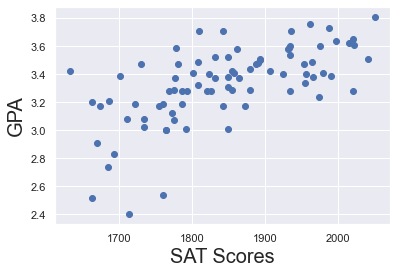

In [6]:
plt.scatter(x1,y)
plt.xlabel('SAT Scores', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Obvious Observations: The higher the SAT score, the higher the college GPA

**Regression Formula:** $\hat{y} = {\beta}_{0} + x_{1}\hat{\beta}_{1} + {\epsilon}$

Where: 

$\hat{y}$ = Depedent variable

${\beta}_{0}$ = Constant

$x_{1}$ = Independent variable

${\beta}_{1}$ = Value of Coefficient

${\epsilon}$ = Error

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        14:24:36   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

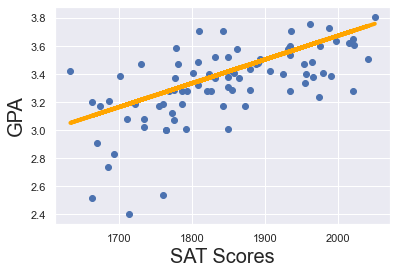

In [8]:
#adding line of best fit or regression line to the plot

plt.scatter(x1,y)
# in this case, yhat formula below is the following from the OLS: 
# SAT coefficient * x1 + const coefficient
yhat = 0.0017*x1 + 0.2750
fig = plt.plot(x1, yhat, lw=4, c='orange', label = 'Regression Line')
plt.xlabel('SAT Scores', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

Null Hypothesis: Is the coefficient equal to 0?

${H}_{0}$:${\beta}_{1}$ = 0?

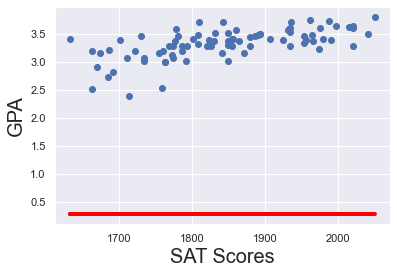

In [9]:
plt.scatter(x1,y)
# in this case, yhat formula below is the following from the OLS: 
# SAT coefficient * x1 + const coefficient
yhat = 0*x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c='red', label = 'Regression Line')
plt.xlabel('SAT Scores', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

$\hat{y} = {\beta}_{0} + x_{1}\hat{\beta}_{1} + {\epsilon}$

Null Hypothesis: If ${\beta}_{1}$ = 0 then $\hat{y}$ = $b{\beta}_{0}$

Meaning that the line of best fit would start with ${\beta}_{0}$ (as a constant or intercept) at 0.275 and be a horizontal line

# Reviewing Summary Table (Definitions):

**Dependent Variable:** The variable we are trying to predict (GPA in this case).

**Model:** OLS (Ordinary Least Squares) - Seeks to minimize squares error (this method tries to find the line that minimizes errors between the observations and the regression line). Graphically it'll be the line that is closest to all points (or observations).

**Method:** Least Squares (OLS).

 
**R-Squared:** explained variability from sample (in this example, .406 = nearly 41%). In our example, 40% of variability is explained by this model, but there maybe missing pieces (such as other features or traits like gender, socioeconomic status, attendance, etc).

**Standard Error (std err):** Shows accuracy of predictions. The lower the std err, the better the estimates.

**R-Squared ($R^{2}$)** Goodness of the model's "fit." The formula for F-Stat is: $\frac{SSR}{SST}$ The closer it is to 1, the better the model.

**Adjusted R-Squared ($\bar{R}^{2}$)** Measures how much variability is explained in the model. The closer it is to 1, the better the model. If $R^{2}$ rises when adding new variables, but $\bar{R}^{2}$ decreases, we can omit the variable since that would tell us it holds no predictive power.

**F-Statistic (F-Stat):** Test for overall significance of the model. The higher the F-Stat, the better overall signficance of the model.

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        14:24:37   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Sum of Squares Review:

**Sum of Squares (SST or TSS):** $\sum \limits _{i=1} ^{n} = (y_{i} - \bar{y})^{2}$ 

Squared differences between observed dependent variables and its mean (average). Much like variance in descriptive statistics, it is a measure of total variability in data sets.

**Sum of Squares Regression (SSR or ESS):** $\sum \limits _{i=1} ^{n} = (\hat{y}_{i} - \bar{y})^{2}$ 

Sum of differences between predicted value and the mean of the dependent variable (tldr: how well your line fits the data. This is also known as the Explained Sum of Squares (ESS).

**Sum of Squares Error (SSE or RSS):** $\sum \limits _{i=1} ^{n} = \epsilon_{i}^{2}$ 

Error is different between observed value and predicted value. We usually want to minimize the error. This is also known as Residual Sum of Squares (RSS).

# Connection between these:

**SST = SSR + SSE** OR **TSS = ESS + RSS**

$\sum \limits _{i=1} ^{n} = (y_{i} - \bar{y})^{2} = \sum \limits _{i=1} ^{n} = (\hat{y}_{i} - \bar{y})^{2} + \sum \limits _{i=1} ^{n} = \epsilon_{i}^{2}$

**To show how this is relevant, R-Squared ($R^{2}$)** which serves as the goodness of the model's "fit" has a formula involving Sum of Squares toal and the Sum of Squares Regression 

Formula for F-Stat is: $\frac{SSR}{SST}$ OR $\sum \limits _{i=1} ^{n} = \frac{(\hat{y}_{i} - \bar{y})^{2}}{(y_{i} - \bar{y})^{2}}$ 

# **Multiple Linear Regression and Adjusted R-Squared**

In [11]:
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [12]:
data.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [13]:
y= data['GPA']
x1 = data[['SAT', 'Rand 1,2,3']]

In [14]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           6.58e-10
Time:                        14:24:37   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Findings Between Linear Regression and Multi-Linear Regression:

Looking at the results, you can find that the R-Squared ($R^{2}$) value is slightly higher than the linear model from the previous exercise (0.046 vs 0.047), but the Adjusted R-Squared ($\bar{R}^{2}$) value shows an even lower number. Adjusted R-Squared ($\bar{R}^{2}$) is the basis for comparing models as long as the same dependent variable (y) and the same dataset are being used for each model. Basically what this is telling us is that adding in the extra **Rand 1,2,3,** feature took away from the efficacy of the regression, leading to a lower quality model. This proves that though Multi-Linear or multi-variate models are great, picking the wrong features or variables can lead to poorer model predictability

# Other Definitions (Regression Assumptions)
## Divided into 5 Assumptions:
1. **Linearity** - Linear Regression is the simplest model where each indepedent variable is multiplied by a coefficient and summed up to predict the dependent variable/ value 

   ### ${y} = {\beta}_{0} + x_{1}{\beta}_{1} + x_{2}{\beta}_{2} +...x_{k}{\beta}_{k}+{\varepsilon}$
   

2. **No Endogeneity of Regressors** - Mathematically expressed as the covariance of the error and the x'es as 0 for any error or x

   ###  $\sigma_{x\varepsilon} = 0 : 	\forall x, \epsilon$


3. **Normality and Homoscedasticity** Normality means error term is normally disributed and the expected value of the error is 0 represented by:

  ### $\varepsilon\sim N(0,\sigma^{2})$
  
  Homoscedasticity means constant variance.
  
  
4. **No autocorrelation** The covariance of any two error terms is 0. That is the assumption that would usually stop us from using a linear regression in our analysis. Represented by:

   ### $\sigma_{\varepsilon_{i}\varepsilon_{j}} = 0 : \forall i, \neq j$

5. **No Multicollinearity** Observed when two or more variables have a high correlation betwene each other.

    ### $	\rho_{x_{i}x_{j}} \not\approx 1 : \forall i,j; i \neq j$

**All of these assumptions are crucial to regressions. The biggest mistake that can be made is to ignore anything that might violate these assumptions.**

# 1. Linearity: ${y} = {\beta}_{0} + x_{1}{\beta}_{1} + x_{2}{\beta}_{2} +...x_{k}{\beta}_{k}+{\varepsilon}$

During Exploratory data analysis, if there is no "linearity" or plot points that look to have a linear relationship, then it is a violation of the linearity assumption:

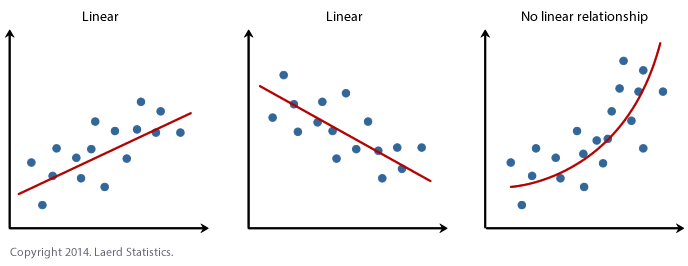
### Fixes:
1. Run a non-linear regression
2. Exponential transformation
3. Log transformation


### Takeaway: If the relationship is non-linear, dont use a regression to fit a line yet

# 2. No Endogeneity of Regressors: $\sigma_{x\varepsilon} = 0 : \forall x, \epsilon$

Refers to the prohibition of a leg between the independent variables and the errors. The error (difference between observed values and predicted values) is correlated with our independent values

Omitted variable bias - You forget to include a relevant variable. as each independent variable explains why, they move together and are correlated.

y is explained some what correlted by Xs
y is explained (somewhat correclated by omitted X)
x and the errors are somewhat correlated


The easiest way to detect and omitted variable bias is through the error term ${\varepsilon}$:

${y} = {\beta}_{0} + x_{1}{\beta}_{1} + x_{2}{\beta}_{2} +...x_{k}{\beta}_{k}+{\varepsilon}$

##### Example: NYC apartment prices based on size: However the smaller the size of the apartments or condos, the higher the price, which comes up as endogeneity of regressors (something is missing from the model like... closeness to public transportation, landmarks, commerce, restaurants, etc).

### Fixes (Difficult to fix):
1. Ask yourself where the sample was drawn from? Can we get a better sample?


### Takeaway: Omitted Variable Bias can lead to biased and counterintuitive estimates which can be toxic to regression analyses. When it doubt, include the variables and try your luck.


# 3. Normality and Homoscedasticity: $\varepsilon\sim N(0,\sigma^{2})$

#### Normality (N): 
Not everything follows a normal distribution, but the "assumed normality" of the error term regressions allows t-stats and F-stats to work in analysis

#### Central Limit Theorem (CLT):
For large samples, the central limit terms apply to the error terms too. We can assume normality is a given for us due to this.

#### Zero mean of error terms (0):
If the mean is not expected to be 0, then the line is not the best fitting one. Having an intercept solves for the problem. In real life it is unusal to violate this part of the assumption.

#### Homoscedasticity ($\sigma^{2})$):
To have equal variance with the other. What if there is a pattern in the variance? Example of a dataset where errors have a different variance look like the below

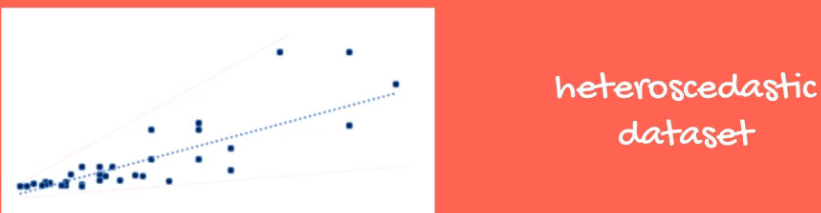

The above image shows that for smaller values for independent and dependent variables, it would be more accurate than bigger values.

##### Example with income: Poor people might be stuck spending similar money; however a wealthy person might choose to buy Michelin restaurant food, but then boil and egg for dinner the next day. Variance is huge and therefore the variance would cause the hypothetical model to be heteroscedastic instead of homoscedastic.


### Fixes/Preventing:
1. Check of Ommited Variable Bias (OVB)
2. Look for outliers and remove them
3. **Log Transformations: prior to log transformations, simple linear formula is:**

    #### $\hat{y} = {b}_{0} + x_{1}{b}_{1}$ 
    
    ##### "As x increases by 1 unit, Y increases by ${b}_{1}$ units."
    
    
3. **semi-log model:** take a log of a variable (x or y). 

    #### $\hat{y} = {b}_{0} + {b}_{1}(logx_{1})$ (shrinks x scale reduced width of graph)
    
    OR
    
    #### $log(\hat{y}) = {b}_{0} + x_{1}{b}_{1}$  (shrinks y scale; reduced height of graph)
    
    ##### As x increases by 1 unit, Y increases by ${b}_{1}$ percent.
    
    
5. **Log-log model:** taking log of both x and y

    #### $log(\hat{y}) = {b}_{0} + {b}_{1}(logx_{1})$ (shrinks scale for both x and y)
     
    ##### As x increases by 1 percent, Y increases by ${b}_{1}$ percent.

### Takeaway: In order to create homoscedasticity, we must transform high variance data into manageable data that can feasbilty have errors equal the same number. taking a log of variables can potentially facilitate this and allow for a linear relationship that we can fit a regression line to the data

# 4. No autocorrelation (AKA No Serial Correlation): $\sigma_{\varepsilon_{i}\varepsilon_{j}} = 0 : \forall i, \neq j$

#### Errors are assumed to be uncorrelated.

Change every day with same underlying asset. Time series tend to have autocorrelation due to the fact that it is a continuous stream.

**The Day of the Week Effect:** Stock market fluctuations are a time series which has distinguishable patterns day over day. (Example is that bad news is released after market on fridays and investors have a change to read news and have info so they make choices to sell or buy on Mondays, while as the week goes on to Friday, there is more info obtained throguhout the week)


### Fixes/Preventing:
1. Check the Durbin-Watson Test: Values fall between 0 and 4. 2 indicates no autocorrelation while values below 1 and above 3 are cause for alarm. In the face of autocorrelation, we should avoid using linear regression models. Thats it.
2. Or you can focus on alternative models: **Autoregressive model, Moving Average Model, Autoregressive Moving Average model, Autoregressive integrated moving average model**

### Takeaway: The only takeaway is that if you have autocorrelation, you have to use a different model than linear regression based models

# 5. No Molticollinearity $	\rho_{x_{i}x_{j}} \not\approx 1 : \forall i,j; i \neq j$

#### When two or more variables have a high correlation (easy to spot and easy to fix).

a=2+5*b : a and b are two variables with an exact linear representation. In a model with a and b in this instance, it represents perfect multicollinearity (which we don't want). 

Rationale: If a can be represented using b, there is no point in using both. Also if there is **Imperfect Multicollinearity**(when correlation between two variables are ALMOST close to exact, there is still no point in using both)


#### Examples: Two bars, Bonkers and theShakespeare bar: Market shaeImagine there are two bars in a city, let's call them Bar A and Bar B. They are located very close to each other, so they have a lot of similarities, like the same type of drinks, atmosphere, and customers. Now, let's say you want to figure out what factors affect the market share of these bars. You collect data about them, like the number of customers they have, the prices of their drinks, the events they host, and the quality of their service. If you notice that the market share of Bar A and Bar B always goes up or down together, meaning when one bar gets more customers, the other also gets more customers, and when one bar loses customers, the other does too. This situation is like multicollinearity. Multicollinearity, in this case, means that the market share of Bar A and Bar B are strongly connected because they are so similar and located close to each other. It becomes difficult to tell which specific factors, like the price or the events, are more important in influencing their market shares because both bars tend to act similarly. In other words, the data might show that both bars always succeed or struggle together, but it doesn't give you a clear idea of how much each individual factor (price, events, etc.) contributes to their success or struggle.In regressions, multicollinearity can make it hard to distinguish the real impact of each factor because the factors are so connected and move together. To understand better, you might need to look at each bar separately or consider other factors that are more unique to each bar to figure out their individual effects on market share.

### Fixes/Preventing:
1. Drop like variables
2. Transform them into one (example: some average metric)
3. Keep them both but treat them with extreme caution, correct approach depends on research at hand
4. Find correlation between each two pairs of indepdent variables

### Takeaway: variables must be compared to unsure there is no multicollinearity

# Dummy Variables

Used to include categorical data into the regression variables. 


Gender, Season, Brand

In [16]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [17]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [18]:
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


#### In this dataset, there is a new feature/variable called Attendance, where the background include if a student has attended more than 75% of their classes, their attendance is equal to Yes while the opposite is a No. Making dummy variables will imitate categories with numbers.

In [19]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [20]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


46% of students have attended more than 75% of the lessons

# Regression

In [21]:
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

In [22]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.19e-15
Time:                        14:24:37   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The overall model is significant based on F-Stat and Prob F-Stat
SAT and Attendance p-values are lower than 0.05; therefore it is statistically significant
Adj R-squared of the model is .555, which is an improvement to the 0.399 prior to adding Attendance 

Prior to adding Attendance, the formula was:

#### GPA = 0.275+0.0017*SAT

The model after adding Attendance dummy variable is:

#### GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendance

But since dummy data for attendance is either a 1 or a 0, the formulas end up being like this:

#### Non-Attendance: GPA = 0.6439 + 0.0014 * SAT + 0.2226 * 0 OR GPA = 0.6439 + 0.0014 * SAT


#### Attendance: GPA = 0.6439 + 0.0014 * SAT + 0.2226 * 1 OR GPA = 0.8665 + 0.0014 * SAT




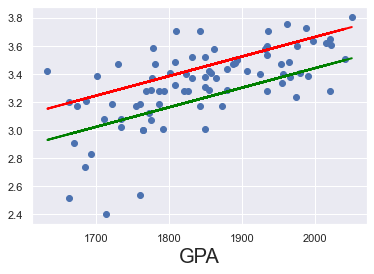

In [23]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

What we observe are two equations with the same slope but different intercepts. The conclusion for attendance is that average, students who attended more than 75% of their courses had a 0.2226 higher average GPA than those who did not attend. These are basically two different regression lines for attendance and you can see the observed values separation by Attendance. Below you will see red observations are those that attended more then 75% of their classes vs green observations for those that did not.

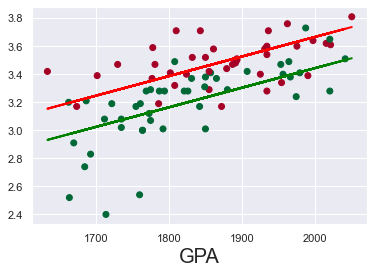

In [24]:
plt.scatter(data['SAT'],y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

Overlaying original Regression line from earlier exercise without Attendance:

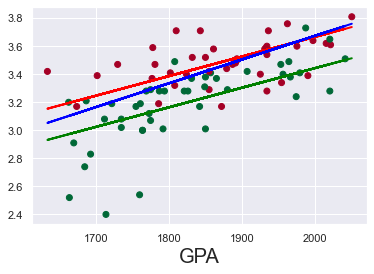

In [25]:
plt.scatter(data['SAT'],y, c=data['Attendance'], cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw=2, c='green', label = 'No Attendance Regression Line')
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c='red', label = 'Attendance Regression Line')
fig = plt.plot(data['SAT'], yhat, lw=2, c='blue', label = 'Original Regression Line')
plt.xlabel('SAT', fontsize=20)
plt.xlabel('GPA', fontsize=20)
plt.show()

To use this model, we now need two independent values: GPA and Attendance

# How to make predictions based on the regressions we create

In [26]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In this example, we will be making a data set with two examples:

Bob, who got 1700 on the SAT anddid NOT attend more than 75% of his courses

Alice, who got 1670 on the SAT and attended more than 75% of her courses

In [27]:
new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1] })
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [28]:
new_data.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [29]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [30]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


Alice scored lower on SATs, but her attendance was higher so the prediction has Alice having a higher GPA

# Practice Exam Questions

In [31]:
data = pd.read_csv('Startups.csv')
data.describe()

,R&D Expenditure,Administration Expenditure,Marketing Expenditure,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## In this example, they wanted to simply look at marketing expenditure as a variable related to profit.

In [32]:
y = data['Profit']
x1 = data['Marketing Expenditure']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        14:24:37   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                      6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing Expenditure     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

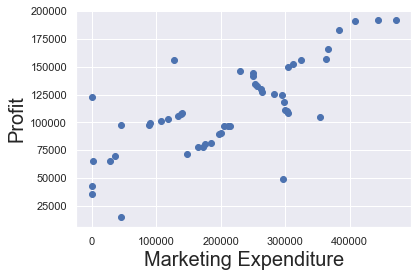

In [33]:
plt.scatter(x1,y)
plt.xlabel('Marketing Expenditure', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.show()

Looks like there are strong positive correlations between Marketing expenditure in relation to . The formula for this looks like:

Profit = 60000 + 0.2465(Marketing Expenditure)

The intercept is 60000 and the slope coefficient is 0.245 for this formula. The regression line would look like the following:


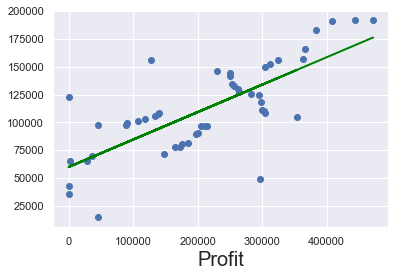

In [34]:
plt.scatter(data['Marketing Expenditure'],y)
yhat = 60000+ 0.2465*data['Marketing Expenditure']
fig = plt.plot(data['Marketing Expenditure'], yhat, lw=2, c='green')
plt.xlabel('Marketing Expenditure', fontsize=20)
plt.xlabel('Profit', fontsize=20)
plt.show()

##### Q: Dillan Rowdy is a private equity data analyst at Advent International. Dillan's manager asks him to evaluate the start-up sector in Florida as she thinks it will offer attractive rates of returns over the next few years. As a result, Dillan decides to create a model that will predict the profitability of such private companies. Using the results form the previous question, which of the following values comes closest to the predicted profit vlaue of a private company that spends $325,000 on marketing?

A: Using the formula, ${y} = {\beta}_{0} + x_{1}{\beta}_{1}$ and utilizing the summary stats from the fit model, we can determine the following:

${y}$ = Profit

${\beta}_{0}$ = 60,000

$x_{1}$ = Marketing Expenditure

${\beta}_{1}$ =0.2465

Leading to a formula that looks like:

${Profit = 60,000 + 0.2465*[325,000]} \approx 140,000.00$ 

Below is two methods of arriving at this answer via code:

In [35]:
#Simple Way:
marketing_expenditure = 325000 #private company marketing expenditure
print(60000+ 0.2465*marketing_expenditure)

140112.5


In [36]:
#programmatic way. Revisit the Marketing expenditure variable model
y = data['Profit']
x1 = data['Marketing Expenditure']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

new_data = pd.DataFrame({
    'const': [1],  # Replace 'some_value' with the actual value
    'Marketing Expenditure': [325000]
}, index=['private company'])

new_data = new_data[['const', 'Marketing Expenditure']]
# Assuming 'results' is the fitted model
predictions = results.predict(new_data)
print(predictions)

private company    140102.809762
dtype: float64


##### Q: Dillan feels that the regression equation can be improved if he add additional explanatory variables, proposing 2 that he feels are most relevant at predicting a company's profits: 'R&D Expenditures' and 'Administration Expenditures.' Create a multiple linear regression model determine what statement is NOT accurate:

1. Both variables, 'Administration Expenditure' and 'Marketing Expenditure,' are not significant at the 5% significance level (p-value)
2. The 'R&D Expenditure variable is not significant at a 1% significance level
3. The R-squared has improved significantly, compared to the simple linear regression model using 'Marketing Expenditure, as a sole explanatory value.
4. The linear regression model is significant based on F-score

In [37]:
#Create multiple linear regression model with R&D and Admin Expenditures as variables as well
#and find its summary stats:
y = data['Profit']
x1 = data[['Marketing Expenditure','R&D Expenditure', 'Administration Expenditure']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        14:24:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing Expenditure          0.0272      0.016      1.655      0.105      -0.006       0.060
R&D Expenditure                0.8057      0.045     17.846      0.000       0.715       0.897
Administration Expenditure    -0.0268      0.051     -0.526      0.602      -0.130       0.076
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS Reqression Results show that the administration and marketing expenditures are not statistically significant due to their p-values being 0.602 and 0.105 respectively. This means that R&D expenditure is the best measure as a variable having a statistically significant p-value of less than 0.05 (5%). 

The R-Squared value shows the model is extremely accurate while the F-Prob stat shows a number extremely close to 0 which supports the idea that the model is significant.

So to answer the question, the false comment is that **"The 'R&D Expenditure variable is not significant at a 1% signficant level"** because in reality its p-value is less than 0.05

##### Q: Based on the results from the previous table, drop the variables that are insignificant and predict the profit of a private company base don the following values:

R&D Expenditure: 125,000

Administration Expenditure: $120,000

Marketing Expenditure: $420,000

From the previous exercise, we saw that the coefficients for Administration and Marketing Expenditures had high p-values (greater than 5%), which shows that they were not significant coefficients for the model (despite there being a high R-squared value from the linear model with marketing expenditure as the only coefficient. From the OLS stats table above, we see that R&D Expenditure was the only coefficient with a p-value of less than 5%. Let's create a model that observes only this expense in relation to profit:

In [38]:
y = data['Profit']
x1 = data[['R&D Expenditure']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.50e-32
Time:                        14:24:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Expenditure     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A: Using the formula, ${y} = {\beta}_{0} + x_{1}{\beta}_{1}$ and utilizing the summary stats from the fit model, we can determine the following:

${y}$ = Profit

${\beta}_{0}$ = 49,030

$x_{1}$ = R&D Expenditure

${\beta}_{1}$ =0.8543

Leading to a formula that looks like:

${Profit = 49,030 + 0.853*[125,000]} \approx 155,819$ 

Below is two methods of arriving at this answer via code:

In [39]:
#Simple Way:
rd_expense = 125000 #private company marketing expenditure
print(49030+ 0.8543*rd_expense)

155817.5


In [40]:
#programmatic way. Revisit the Marketing expenditure variable model
y = data['Profit']
x1 = data['R&D Expenditure']
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

new_data = pd.DataFrame({
    'const': [1],  # Replace 'some_value' with the actual value
    'R&D Expenditure': [125000]
}, index=['private company'])

new_data = new_data[['const', 'R&D Expenditure']]
# Assuming 'results' is the fitted model
predictions = results.predict(new_data)
print(predictions)

private company    155819.320509
dtype: float64


As you can see, the simplistic formulaic approach leads to an answer of 155817.5 and the model-based approach leads to 155819.32

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           3.50e-32
Time:                        14:24:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Expenditure     0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared and Adj. R-Squared values (being close to 1) suggest a strong model with R&D Expenditure coefficient p-value much lower than 5 percent which suggest statisticaly sigficant coefficient. There is no perceived autocorrelation since the Durbin-Watson score sits above 1 and the model's strength is also backed up by a very low Prob (F-stat).

The only thing that may be troublesome to this model would be the lack of variables since R&D is the only strong coefficient tied to profit from this dataset. In real life examples, a suggestion would be to find other variables (maybe how long the company has been around, how many employees, categories of employees, and other features) that may help to create a multi-linear model that can more accurately predict profit and reduce error in predictions. Next, we will redo some of the linear regressions above using scikit-learn (sklearn)

# II. SKLearn

Statsmodels is great for learning, but the industry utilizes SKLearn more.

# Reviewing Linear Models

##### Import the relevant libraries

In [42]:
from sklearn.linear_model import LinearRegression

## Load the Data

In [43]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Create the Regression

##### Declare independent and dependent variables

In [44]:
x = data['SAT']
y= data['GPA']

In [45]:
print(x.shape)
print(y.shape)

(84,)
(84,)


Need to change the shape of the array from 1 dimension (above) to 2 dimensions for it to go into the Linear Model, this is a problem that comes across in simple linear regressions

In [46]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

## Same Regression in sklearn

In [47]:
reg = LinearRegression()

In [48]:
reg.fit(x_matrix,y)
#Used to show parameters(LinearRegression(copy=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression()

## Linear Regression parameters

**copy_X=True:** when it is set to True, it creates a copy of the inputs before fitting them as a safety net against Normalization or other transformations while creating an algorithm (like how we copied dataframes in statsmodels

**fit_intercept:** in statsmodels we had to manually add a constant, but this parameter takes care of that automatically; can set to false if we want to ignore intercept or ${\beta}_{0}$ constant

**n_jobs:** A parameter used when we want to parallelize routines. Only one CPU is used in this above example; but if we have more than one CPU available, we can speed up more complicated models by utilizng multiple CPUs

### R-Squared, Coefficients, and Intercept

In [49]:
#R -Squared
print("R-Squared is: ", reg.score(x_matrix,y))

#Coefficient
print("Coefficient is: ", reg.coef_)

#Intercept
print("Intercept is: ", reg.intercept_)

R-Squared is:  0.40600391479679765
Coefficient is:  [0.00165569]
Intercept is:  0.27504029966028076


The above is similar to the OLS summary table from before with statsmodels package

## Making Predictions

In [50]:
input_data = [1740]
input_array = np.array(input_data)  # Convert the list to a NumPy array
reshaped_data = input_array.reshape(1, -1)  # Reshape the data to a 2D array with one row and one column


reg.predict(reshaped_data)

array([3.15593751])

In [51]:
new_data = pd.DataFrame(data=[1740,1760], columns = ['SAT'])
new_data

,SAT
0,1740
1,1760


In [52]:
new_data['Predicted GPA'] = reg.predict(new_data)
new_data

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted GPA
0,1740,3.155938
1,1760,3.189051


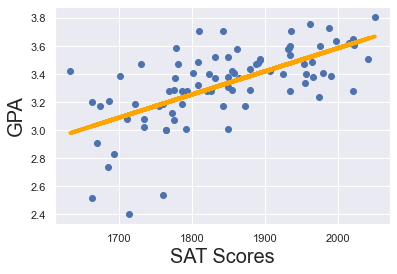

In [53]:
#Plotting the same graph as above but with the sklearn model this time:

plt.scatter(x_matrix,y)
yhat = reg.coef_*x_matrix + reg.intercept_
# in this case, yhat formula below is the following from the OLS: 
# SAT coefficient * x1 + const coefficient
#yhat = 0.0017*x1 + 0.2750
fig = plt.plot(x_matrix, yhat, lw=4, c='orange', label = 'Regression Line')
plt.xlabel('SAT Scores', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

# Revisiting Multiple Linear Regression (SKLearn)

## Load the data

In [54]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [55]:
data.describe

<bound method NDFrame.describe of      SAT  Rand 1,2,3   GPA
0   1714           1  2.40
1   1664           3  2.52
2   1760           3  2.54
3   1685           3  2.74
4   1693           2  2.83
..   ...         ...   ...
79  1936           3  3.71
80  1810           1  3.71
81  1987           3  3.73
82  1962           1  3.76
83  2050           2  3.81

[84 rows x 3 columns]>

## Create the multiple linear regression

#### Declare the dependent and independent variables

In [56]:
x = data[['SAT', 'Rand 1,2,3']]
y= data['GPA']

#### Build the regression

In [57]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [58]:
#Coefficients
print("Coefficient is: ", reg.coef_)

#Intercept
print("Intercept is: ", reg.intercept_)

Coefficient is:  [ 0.00165354 -0.00826982]
Intercept is:  0.29603261264909486


**In this instance, coefficients are ordered in the way we fed them. In this case, the first coefficient output relates to our 'SAT' feature while the second coefficient relates to our 'Rand 1,2,3' feature.**

## Calculating the R-Squared

In [59]:
#R -Squared
print("R-Squared is: ", reg.score(x,y))

R-Squared is:  0.4066811952814282


Though the above R-Squared is out of the box for sklearn, Adjusted R-Squared steps on the R-squared and adjusts for the number of variables included in the model. If we are using features with little or no explanatory power, R-Squared would rise regardless, so Adjusted R-Squared penalizes the extra features depending

### Formula for Adjusted R^{2}

## $R^2_{adj.} = 1 - (1-R^2)*\frac {n-1}{n-p-1}$

#### n (the number of observations, rows of data)
#### p (the number of predictors, columns)

In [60]:
x.shape

(84, 2)

In [61]:
r2 = reg.score(x,y)
n=x.shape[0] #84
p=x.shape[1] #2
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134

#### This is the same as the OLS Stats Summary table from statsmodels.
As a conclusion, reg.score had an $R^2$ value of 0.407 while the $R^2_{adj.}$ value is lower at 0.392 which suggests that one or more of the predictors have little or no explanatory power.

## Feature Selection from p-values

#### How do you detect variables that are unneeded in models?

#### p-values!

**feature_selection.f_regression:** - F-regression creates simple linear regressions of each feature and the dependent variable. Note that for a simple linear regression, the p-value of the F-Stat would coincide with the p-value of the only independent variable

In [62]:
from sklearn.feature_selection import f_regression

In [63]:
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In the above, there are two sets of arrays: the first is the F-statistics while the other array are the respective p-values

In [64]:
p_values = f_regression(x,y)[1]
p_values = p_values.round(3)
p_values

array([0.   , 0.676])

Going back to the declared features, the first p_value in the array-set is the p_value for 'SAT' while the second p-value in the array-set represents the p_value for 'Rand 1,2,3.' Since the p-value for SAT is less than 5%, it is useful while Rand 1,2,3's p-value is useless due it being 60%+

**p-values are one of the best ways to determine if a variable is redundant, but they provide no infomration whatsoever about HOW USEFUL a variable is. For example, two or more features could have a p-value of 0.05 or less, but that would not necessarily mean they are all equally as important**

F-regression does not take into account the interrelation of the features. A not so simple fix for that is to amend the LinearRegression() class. You can find the relevant code with comments below. Note that the results will be identical to those of StatsModels.

## Creating a Summary Table

In [65]:
reg_summary = pd.DataFrame(data = x.columns.values, columns =['Features'])
#x.columns.values captures all features or you can create one with explicit feature names
#reg_summary = pd.DataFrame(data=['SAT', 'Rand 1,2,3'], columns =['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [66]:
reg_summary['Coefficients'] = reg.coef_
reg_summary['p-values'] = p_values
reg_summary

,Features,Coefficients,p-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


## Feature Scaling - The process of transforming data into a standard scale (having features scaled to have the same magnitude can have drastic effects on the model)

**Standardization:** the process of subtracting the mean and dividing it by the standard deviation (a type of Normalization)

**Normalization:** has a different meaning depending on the case; here - we subtract the  man but divide by the L2-norm of the inputs

[Wiki article on feature scaling](https://en.wikipedia.org/wiki/Feature_scaling)

[Article on L1-norm and L2-norm](http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/)


## Standardization Formula: $\frac{x-\mu}{\sigma}$

**X:** Original Variable

**${\mu}$:** Mean of the original variable

**${\sigma}$:** Standard deviation of the original variable

This allows features to look similar



In [71]:
#Bringing back decleared independent and dependent variables
x = data[['SAT', 'Rand 1,2,3']]
y= data['GPA']

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
#create empty standard scaler object
scaler = StandardScaler()

## StandardScaler Parameters

Scaler will contain all of the standardization info in the object

**copy=True:** 

**with_mean=True:**

**with_std=True:**

In [74]:
scaler.fit(x).get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

## StandardScaler.transform(x) - transforms the unscaled inputs using the information contained in the scaler object (feature-wise)

based way is to create the Scaler object, fit indepdent variable(s), **x**, into scaler.fit(**x**), then create a "**x_scaled**" variable that stores the transformed variables from scaler.transform(**x**)

In [73]:
#stores the transformed data into x_scaled variable after applying standardization formula to values
x_scaled = scaler.transform(x)

In [75]:
x_scaled

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087],
       [-1.68684014, -1.24637147],
       [-0.78218146, -0.07002087],
       [-0.78218146, -1.24637147],
       [-0.51270866, -0.07002087],
       [ 0.04548499,  1.10632974],
       [-1.06127829,  1.10632974],
       [-0.67631715, -0.07002087],
       [-1.06127829, -1.24637147],
       [-1.28263094,  1.10632974],
       [-0.6955652 , -0.07002087],
       [ 0.25721362, -0.07002087],
       [-0.86879772,  1.10632974],
       [-1.64834403, -0.07002087],
       [-0.03150724,  1.10632974],
       [-0.57045283,  1.10632974],
       [-0.81105355,  1.10632974],
       [-1.18639066,  1.10632974],
       [-1.75420834,  1.10632974],
       [-1.52323165, -1.24637147],
       [ 1.23886453, -1.24637147],
       [-0.18549169, -1.24637147],
       [-0.5608288 , -1.24637147],
       [-0.23361183,  1.10632974],
       [ 1.68156984,

## Regression with Scaled Features

In [77]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [80]:
print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [ 0.17181389 -0.00703007]
Intercept:  3.330238095238095


### Creating a summary table

In [86]:
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns = ['Features'])
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [87]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


**Weights:** Synonymous with "coefficients." The closer a weight is to 0, the smaller the impact and vice versa

**Bias:** Another word of "intercept." For example, a regression line has a constant coefficient and this can change when performing feature selection; the constant coefficient serves as a "bias"

In the above summary table, we can see that the weight of "Rand 1,2,3" is very close to 0/ does not have much of an impact while SAT would have more of an impact on the dependent variable. SKLearn does not come with native summary table like statsmodels.summary() because of the fact that we feature scale and penalize features by assigning lower weights in the first place. In general it is good to prune features that have very low weights

## Making Predictions With the Standardized Coefficients (Weights)

In [88]:
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [89]:
reg.predict(new_data)

C:\Users\kyung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

The above does not look like the intended GPA because the model was trained on the scaled x (standardized) inputs, it expects to have standardized inputs in the similar fashion

In [90]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [91]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

### What if we removed the "Random 1,2,3" feature?

In [92]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,0].reshape(-1,1)
reg_simple.fit(x_simple_matrix,y)

LinearRegression()

In [94]:
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

When rounding up to 2 digits after the decimal, the GPA predictions are very similar to the ones that came about from having "Rand 1,2,3" 

The weights will be so close to 0 that p-values are not as signficant

## Underfitting and Overfitting

**Underfitting:** The model has not captured the underlying logic of the data

**Overfitting:** Our training has focused on the particular training set so much it has "missed the point"

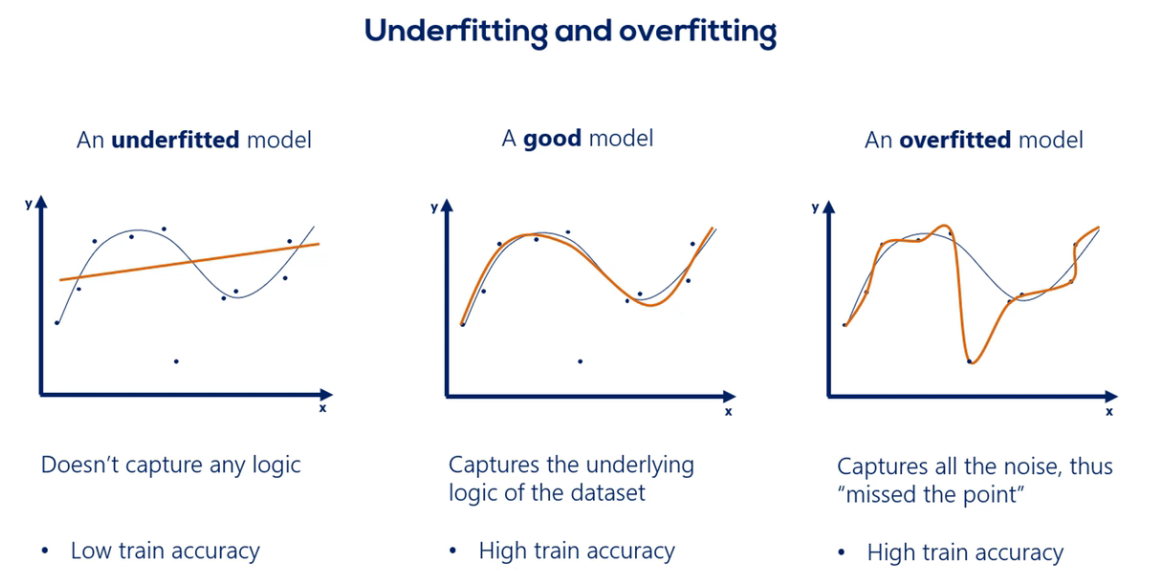

One popular solution to overfitting: split the initial dataset into two - training and test

# III. Train, Test, Split

#### Import relevant libraries

In [96]:
from sklearn.model_selection import train_test_split

#### Generate some data to split

In [120]:
#np.arange([start,]stop,[step]) - returns evenly spaced values within a given interval. 
#By default, the output is an ndarray
a = np.arange(1,101)

In [99]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [123]:
b = np.arange(501,601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

#### Split the data

In [102]:
train_test_split(a)

[array([ 87,  50,   3,  25,  44,   2,  28,  40,  27,  94,  72,   4,  61,
         18,  41,  63,  80,  76,  70,  95,  85,   5,  21,  47,  71,  54,
         23,  81,  43,  60,  22,  26,   9,  82,  49,  86,  57,   6,  83,
         42,  97,  30,  58,  66,  93,  39,  90,  65,   1,  15,  37,  53,
         31,  55,  96,  11,  24,  29,  33,  35,  45,  36,  77,  99,  56,
         62,  91,  64,  59,  78, 100,  12,  92,  75,  74]),
 array([84, 19, 69, 14, 16, 10, 51, 32, 89, 68, 48, 98, 20, 67, 13, 38, 73,
        79, 46, 88,  8,  7, 17, 34, 52])]

**train_test_split(x,y):** splits up existing observation data into training sets and testing sets to try and reduce overfitting of data. The standard default for train_test_split is 75% allocated to training sets and 25% allocated to testing sets.

**parameter: test_size** allows one to add details on how big you would want the test size to be sinec 25% can be too much of the data to allocate to testing.

**parameter: shuffle=True** default setting for train and test sets to be randomized during split, however for time series data, this may need to be set to false to maintain fidelity. In practice, we want to shuffle the data to reduce bias

**random_state=42** Default 42 maintains the shuffled split to ensure consistency when fitting model. The number can be anything within the parameter, but no matter how many times we re-run train_test_split, we will still end up with the same values in the split according to that number


**NOTE:** train_test_split can lead to slightly different results when fitting to models (ex: ${R^2}$ value could be 1 or 2% different just because of how the train/test were split)


In [128]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
#in this example, we are overriding the default by reducing the default test size 5% from 25% to 20%

#### Explore the result

In [129]:
a_train.shape, a_test.shape

((80,), (20,))

In [130]:
a_train

array([ 56,  89,  27,  43,  70,  16,  41,  97,  10,  73,  12,  48,  86,
        29,  94,   6,  67,  66,  36,  17,  50,  35,   8,  96,  28,  20,
        82,  26,  63,  14,  25,   4,  18,  39,   9,  79,   7,  65,  37,
        90,  57, 100,  55,  44,  51,  68,  47,  69,  62,  98,  80,  42,
        59,  49,  99,  58,  76,  33,  95,  60,  64,  85,  38,  30,   2,
        53,  22,   3,  24,  88,  92,  75,  87,  83,  21,  61,  72,  15,
        93,  52])

In [131]:
a_test

array([84, 54, 71, 46, 45, 40, 23, 81, 11,  1, 19, 31, 74, 34, 91,  5, 77,
       78, 13, 32])

In [132]:
b_train.shape, b_test.shape

((80,), (20,))

In [133]:
b_train

array([556, 589, 527, 543, 570, 516, 541, 597, 510, 573, 512, 548, 586,
       529, 594, 506, 567, 566, 536, 517, 550, 535, 508, 596, 528, 520,
       582, 526, 563, 514, 525, 504, 518, 539, 509, 579, 507, 565, 537,
       590, 557, 600, 555, 544, 551, 568, 547, 569, 562, 598, 580, 542,
       559, 549, 599, 558, 576, 533, 595, 560, 564, 585, 538, 530, 502,
       553, 522, 503, 524, 588, 592, 575, 587, 583, 521, 561, 572, 515,
       593, 552])

In [127]:
b_test

array([584, 554, 571, 546, 545, 540, 523, 581, 511, 501, 519, 531, 574,
       534, 591, 505, 577, 578, 513, 532])